# Decision Tree

CART (Classification  and Regression Tree)

## What is Decision Tree?

<img src="img\tree.png" width=50% height=50%>

***
* Supervised Learning

* Works for both classification and regression

* Foundation of Random Forests

* Attractive because of interpretability



***

Decision Tree works by:

* Split based on set impurity criteria
* Stopping criteria


***

Source: [Scikit-Learn](http://scikit-learn.org/stable/modules/tree.html#tree)

Some **advantages** of decision trees are:
* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation. 
* Able to handle both numerical and categorical data.
* Possible to validate a model using statistical tests. 
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The **disadvantages** of decision trees include:
* Overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable. Mitigant: Use decision trees within an ensemble.
* Cannot guarantee to return the globally optimal decision tree. Mitigant: Training multiple trees in an ensemble learner
* Decision tree learners create biased trees if some classes dominate. Recommendation: Balance the dataset prior to fitting


***

## Questions:

1. What is a decision tree?

2. Where can you apply decision tree to? numerical problems or categorical problems?

3. Decision tree is also know by what other name?

4. How does a decision tree work?

5. Decision Tree is a foundation of what machine learning algorithm

6. List and explain 3 advantages of decision tree

7. List and explain 3 disadvantages of decision tree

# Classification

## Training a Decision Tree with Scikit-Learn Library

In [1]:
from sklearn import tree

In [2]:
X = [[0, 0], [1, 2]]
y = [0, 1]

In [3]:
clf = tree.DecisionTreeClassifier()

In [4]:
clf = clf.fit(X, y)

In [5]:
clf.predict([[2., 2.]])

array([1])

In [6]:
clf.predict_proba([[2. , 2.]])

array([[ 0.,  1.]])

In [7]:
clf.predict([[0.4, 1.2]])

array([1])

In [8]:
clf.predict_proba([[0.4, 1.2]])

array([[ 0.,  1.]])

In [9]:
clf.predict_proba([[0, 0.2]])

array([[ 1.,  0.]])

`DecisionTreeClassifier` is capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification.

## Applying to Iris Dataset

In [10]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [14]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
X = iris.data[:, 2:]

In [17]:
y = iris.target

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [20]:
clf = clf.fit(X, y)

### Export_graphviz

In [21]:
from sklearn.tree import export_graphviz

In [24]:
export_graphviz(clf,
                out_file="tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

Run the following line on your command prompt

`$ dot -Tpng tree.dot -o tree.png`

<img src="img\tree.png" width=60% height=60%>

## Graphviz

In [25]:
import graphviz

In [26]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)

In [27]:
graph = graphviz.Source(dot_data)

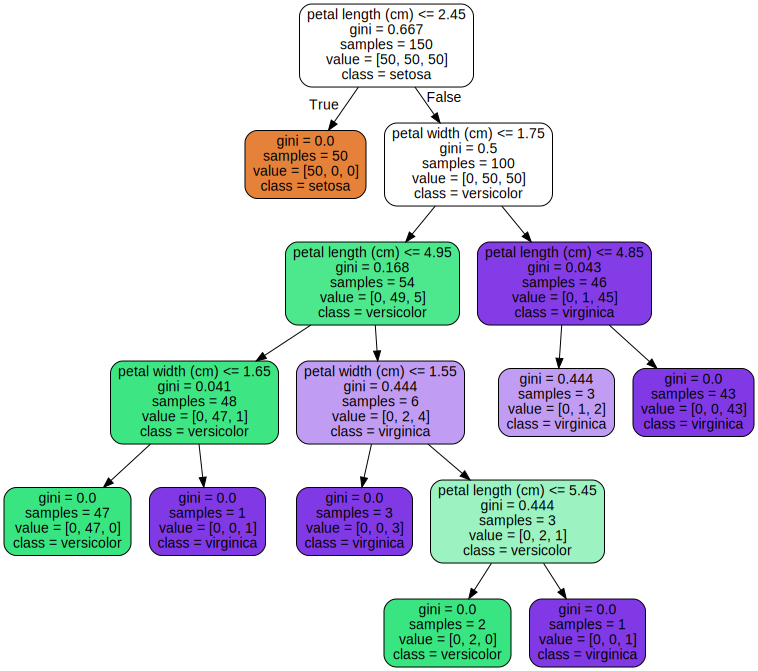

In [28]:
graph

## Visualise the Decision Boundary

In [30]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [33]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [34]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [36]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

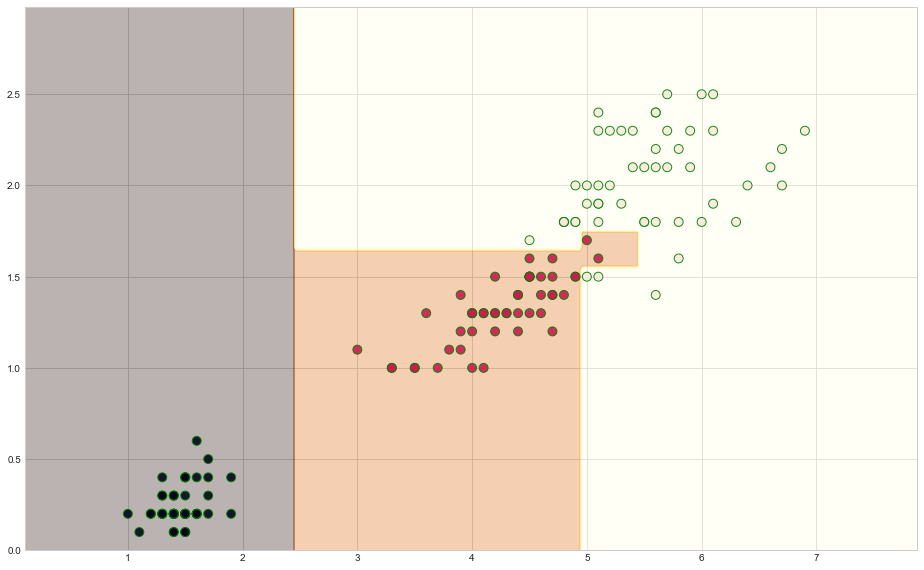

In [37]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');